In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # 导入sklearn的数据集，这里用的是手写数字数据集
from sklearn.manifold import TSNE
from matplotlib.patches import Circle

In [2]:
with open(r"E:\Code\紫晶衍生物\tongyi_report.json","rb") as f:
    db = json.load(f)#这是通义千问输出的report
with open(r"E:\Code\紫晶衍生物\tongyi_参考.json","rb") as f:
    db2 = json.load(f)#这个是参考的文献位点
with open(r"E:\Code\紫晶衍生物\tongyi_abstract.json","rb") as f:
    db3 = json.load(f)#这是通义千问输出的abstract

In [3]:
embedding = []
rating = []
functional_group = []
modification_site = []
application = []
for key,value in db.items():
    embedding.append(value["embedding"])
    rating.append(value["feasibility_rating"])
    functional_group += value["functional_group"]
    modification_site += value["modification_site"]
    application += value["application"]

embedding2 = []
rating2 = []
functional_group2 = []
modification_site2 = []
application2 = []
for key,value in db2.items():
    embedding2.append(value["embedding"])
    rating2.append(value["feasibility_rating"])
    functional_group2 += value["functional_group"]
    modification_site2 += value["modification_site"]
    application2 += value["application"]

embedding3 = []
for key,value in db3.items():
    embedding3.append(value["embedding"])

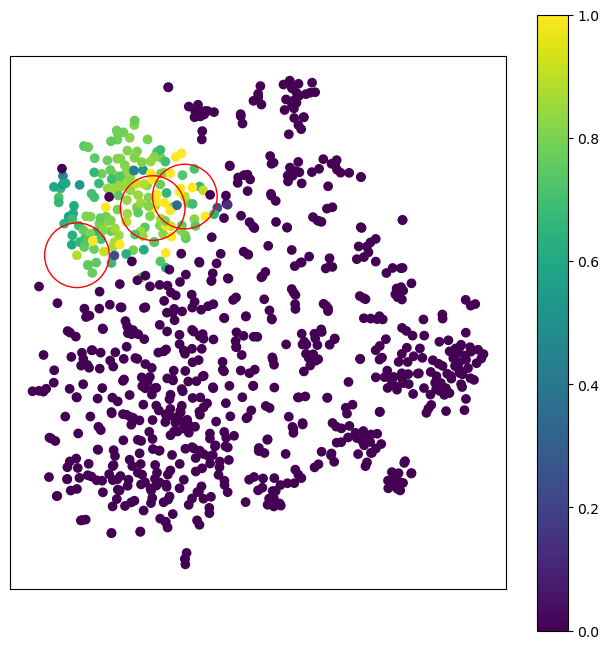

In [7]:

ratings = []
embeddings = []
for emb in embedding:
    embeddings.append(np.mean(np.array(emb),axis=0))
embeddings=np.array(embeddings)

for rate in rating:
    ratings.append(np.mean(np.array([int(i) for i in rate]),axis=0))
ratings=np.array(ratings)

ratings2 = []
embeddings2 = []
for emb in embedding2:
    embeddings2.append(np.mean(np.array(emb),axis=0))
embeddings2=np.array(embeddings2)

for rate in rating2:
    ratings2.append(np.mean(np.array([int(i) for i in rate]),axis=0))
ratings2=np.array(ratings2)

embeddings3 = []
for emb in embedding3:
    embeddings3.append(np.array(emb))
embeddings3 = np.array(embeddings3)
# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)  # 设置n_components为2，表示将数据降维到2维
# X_tsne = tsne.fit_transform(embeddings)
# X_tsne2 = tsne.fit_transform(embeddings2)
# X_tsne3 = tsne.fit_transform(embeddings3)

X_tsne_all = tsne.fit_transform(np.concatenate([embeddings,embeddings2,embeddings3],axis=0))
X_tsne = X_tsne_all[:embeddings.shape[0]]
X_tsne2 = X_tsne_all[embeddings.shape[0]:(embeddings.shape[0]+embeddings2.shape[0])]
X_tsne3 = X_tsne_all[(embeddings.shape[0]+embeddings2.shape[0]):]


# 将降维后的数据可视化
fig,ax=plt.subplots(figsize=(8, 8))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=(ratings-np.min(ratings))/(np.max(ratings)-np.min(ratings)))
# plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1],c=(ratings2-np.min(ratings2))/(np.max(ratings2)-np.min(ratings2)))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],\
            c=((ratings-np.min(ratings))/(np.max(ratings)-np.min(ratings)))*np.dot(embeddings,np.mean(embeddings2,axis=0).reshape(1,-1).T).reshape(-1)/(np.linalg.norm(embeddings,axis=1)*np.linalg.norm(np.mean(embeddings2,axis=0).reshape(1,-1),axis=1)),
           vmin=0,vmax=1)
plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1],c=(ratings2-np.min(ratings2))/(np.max(ratings2)-np.min(ratings2)),vmin=0,vmax=1)
plt.scatter(X_tsne3[:, 0], X_tsne3[:, 1],c=[0 for i in range(len(embeddings3))],vmin=0,vmax=1)
plt.tick_params(axis='both', which='both', 
               bottom=False, top=False, 
               left=False, right=False,
               labelbottom=False, labelleft=False)
plt.colorbar()
circle = Circle((X_tsne2[15, 0],X_tsne2[15, 1]), 5, edgecolor='r', facecolor='none')
ax.add_patch(circle)
circle = Circle((X_tsne2[25, 0],X_tsne2[25, 1]), 5, edgecolor='r', facecolor='none')
ax.add_patch(circle)
circle = Circle((X_tsne2[45, 0],X_tsne2[45, 1]), 5, edgecolor='r', facecolor='none')
ax.add_patch(circle)
ax.set_aspect('equal') 
plt.savefig(r"E:\Code\紫晶衍生物\论文图片\tongyi.jpg")
plt.show()

In [7]:
embedding2 = []
rating2 = []
functional_group2 = []
modification_site2 = []
application2 = []

In [7]:
from collections import Counter
import pandas as pd
arr = rating+rating2
if type(arr[0])==list:
    arr=[sum([int(i) for i in a]) for a in arr]
result = Counter(arr)
df = pd.DataFrame([dict(result)]).T
# df.to_excel("functional_group.xlsx")
print(dict(result))

{90: 55, 80: 17, 88: 32, 92: 17, 95: 22, 75: 12, 78: 1, 70: 3, 98: 1, 93: 1, 0: 1, 175: 1, 277: 1, 185: 3, 375: 1, 165: 1, 343: 1, 180: 1, 275: 1, 290: 1, 155: 1}


In [ ]:
108+49+14

In [19]:
# import requests

# # 你的API密钥
# api_key = '175addaa66edef6c2bfd2a9fba914969'
# url = 'https://api.elsevier.com/content/search/sciencedirect'

In [24]:
# import requests

# # DOI of the article you want to retrieve
# doi = '10.1016/j.jallcom.2025.181227'

# # API URL with DOI path parameter
# url = f'https://api.elsevier.com/content/article/doi/{doi}'

# # Headers including your API key and desired response format
# headers = {
#     'X-ELS-APIKey': api_key,
#     'Accept': 'application/pdf'
# }

# # Send GET request
# response = requests.get(url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
#     # Save the PDF content to a file
#     with open('article.pdf', 'wb') as file:
#         file.write(response.content)
#     print("The article has been successfully downloaded.")
# else:
#     print(f"Failed to download the article. HTTP Status code: {response.status_code}")

The article has been successfully downloaded.


In [43]:
functional_group = {"Quaternary ammonium group":40,"Sulfonate group":25,"Hydroxyl group":27,"Phosphate group":12,"Carbonate group":7,"Ether group":15,"Other group":29,"None":16}

In [13]:
application = {"Aqueous redox flow battery":108,"Non-aqueous redox flow battery":19,"Other flow battery":44}

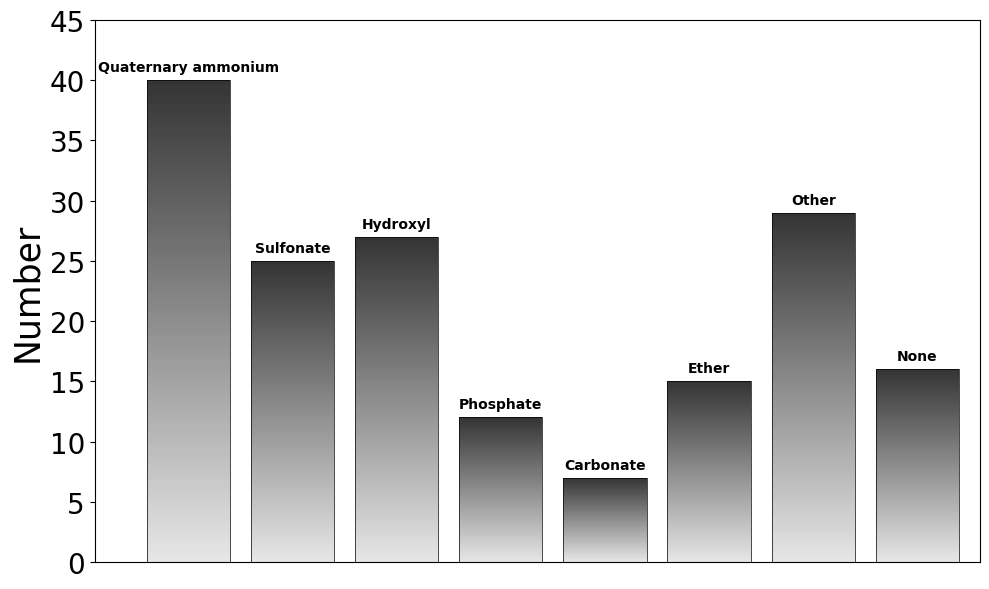

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 示例数据

labels = list(functional_group.keys())
values = list(functional_group.values())

# 创建自定义的渐变色（从深灰到浅灰）
gray_cmap = LinearSegmentedColormap.from_list('custom_gray', [(0.2, 0.2, 0.2), (0.9, 0.9, 0.9)])

# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 6))

# 设置柱子宽度和位置
bar_width = 0.8
x_positions = np.arange(len(labels))

# 设置渐变的分段数
num_segments = 100

# 绘制柱子并添加垂直渐变（顶部深色到底部浅色）
for i, (x, height) in enumerate(zip(x_positions, values)):
    if height > 0:  # 确保有高度才绘制
        # 将柱子分成多个小矩形
        segment_height = height / num_segments
        
        for j in range(num_segments):
            # 计算当前小矩形的高度位置
            y_bottom = j * segment_height
            y_top = (j + 1) * segment_height
            
            # 计算渐变颜色（顶部深色，底部浅色）
            color_value = 1 - j / num_segments
            color = gray_cmap(color_value)
            
            # 绘制当前小矩形
            rect = plt.Rectangle((x, y_bottom), bar_width, segment_height, 
                                 facecolor=color, edgecolor='none')
            ax.add_patch(rect)
    
    # 添加柱子边框
    border = plt.Rectangle((x, 0), bar_width, height, 
                          facecolor='none', edgecolor='black', lw=0.5)
    ax.add_patch(border)
    
    # 在柱子顶部添加数值标签
    ax.text(x + bar_width / 2, height + 0.5,  # x位置在柱子中心，y位置在柱子顶部上方0.5
            labels[i].replace(" group",""),  # 显示的文本
            ha='center',  # 水平居中
            va='bottom',  # 垂直底部对齐
            fontsize=10,  # 字体大小
            fontweight='bold')  # 粗体

# 设置坐标轴
ax.set_xticks(x_positions + bar_width / 2)
# ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_xticks([])  # 隐藏x轴刻度
ax.set_xticklabels([])  # 隐藏x轴标签
ax.set_ylabel('Number',size=25)
plt.yticks(fontsize=20)
# ax.set_title('Matrix Center')
ax.set_ylim(0, max(values) + 5)  # 增加一些顶部空间以容纳标签
ax.set_xlim(-0.5, 8)

# 显示图表
plt.tight_layout()
plt.savefig("tongyi_functional_group.jpg",dpi=300)
plt.show()

In [81]:
with open("tongyi_report.json", "w", encoding="utf-8") as f:
	json.dump(db, f, ensure_ascii=False, indent=4)